In [1]:
import os
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
os.chdir(r"C:\Users\mehul\Time_Series_Analysis")
from predictions import *

In [2]:
df_num = predictions("numeraire_price.csv")
df_num.data = df_num.data.reindex(index=df_num.data.index[::-1])

              Open    High    Low   Close       Volume    Market Cap      Mean
2017-06-23   35.05   48.58  17.67   45.63    43,54,180             -   36.7325
2017-06-24   44.48  116.40  42.04  101.83  1,73,22,100   5,44,22,400   76.1875
2017-06-25  103.21  168.49  72.49   86.55  3,43,31,400  12,62,69,000  107.6850
2017-06-26   88.17   98.78  49.70   59.90    96,39,820  10,78,75,000   74.1375
2017-06-27   59.82   62.31  36.29   53.05    68,24,330   7,31,91,200   52.8675
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2017-06-23 to 2018-02-20
Freq: D
Data columns (total 7 columns):
Open          243 non-null float64
High          243 non-null float64
Low           243 non-null float64
Close         243 non-null float64
Volume        243 non-null object
Market Cap    243 non-null object
Mean          243 non-null float64
dtypes: float64(5), object(2)
memory usage: 15.2+ KB
None
------------------------------

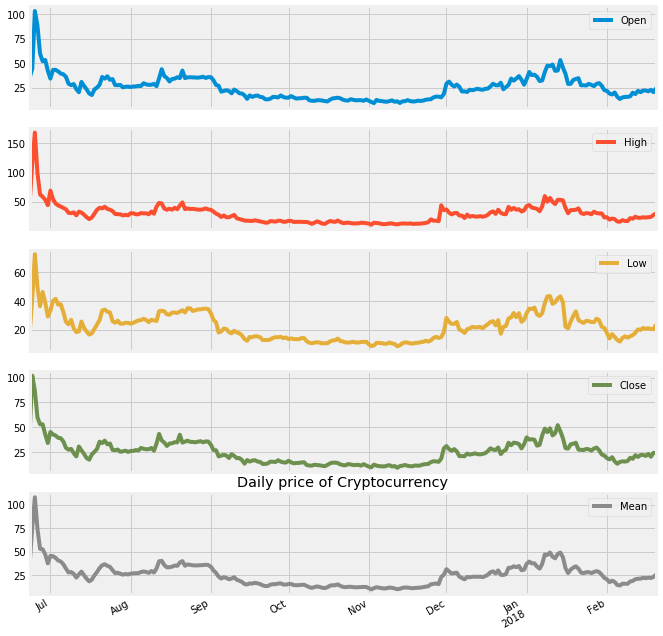

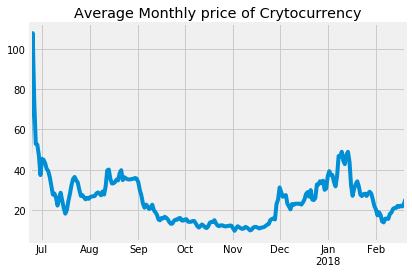

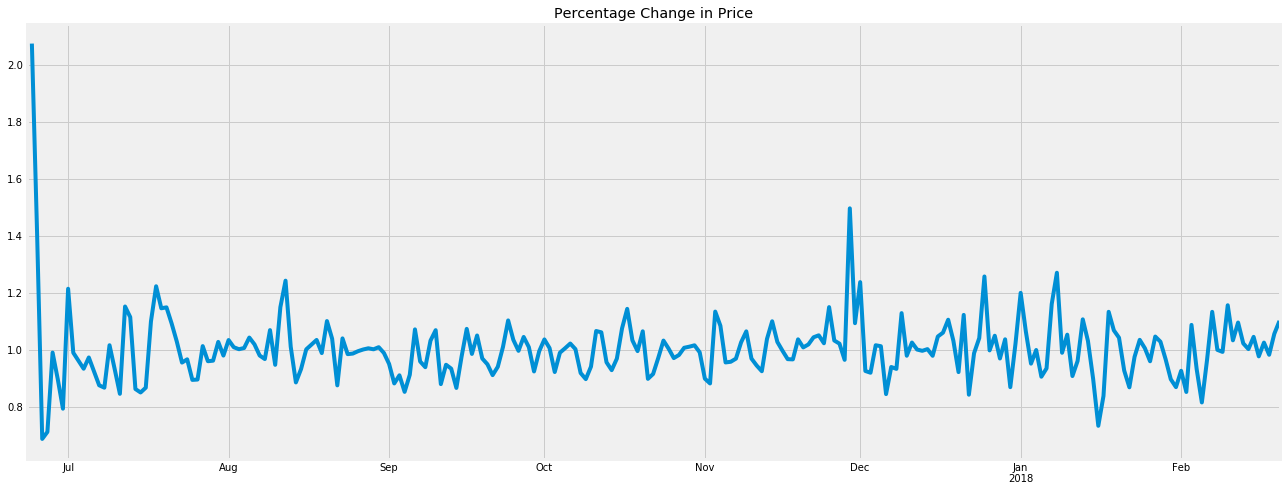

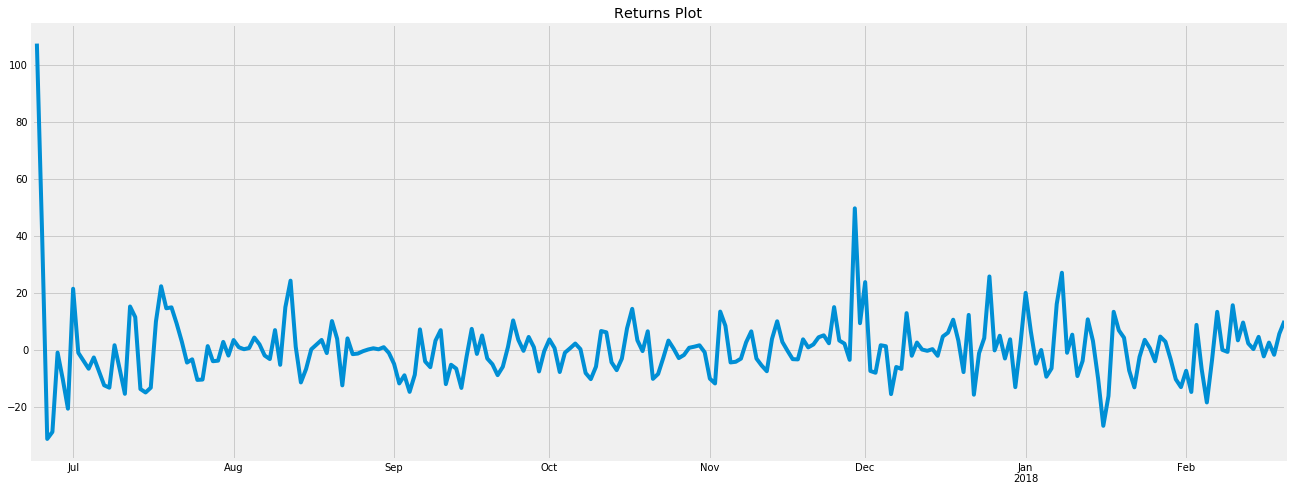

C:\Users\mehul\Time_Series_Analysis\predictions.py:59: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolmean = self.data.Mean.rolling(30).mean()
C:\Users\mehul\Time_Series_Analysis\predictions.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolstd = self.data.Mean.rolling(30).std()


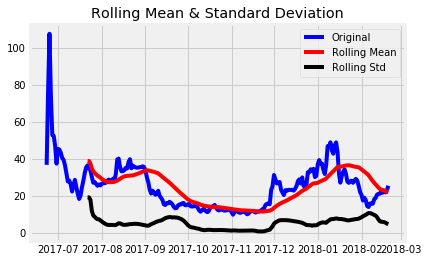

Results of Dickey-Fuller Test
Test Statistic                  -3.722763
p-value                          0.003804
#Lags Used                       3.000000
Number of Observations Used    239.000000
Critical Value(1%)              -3.458011
Critical Value(5%)              -2.873710
Critical Value(10%)             -2.573256
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            0.343653
p-value                   0.100000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.895
P-value                         0.046
Lags                               15
------------------------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [3]:
df_num.description()
df_num.missing()
df_num.plot_daily()
df_num.plot_monthly()
df_num.Percent_change()
df_num.Returns()
df_num.stationarity_test()

In [4]:
from Model import *

In [6]:
num_ret = model(df_num.data)

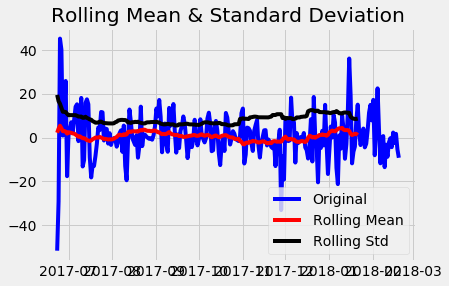

Results of Dickey-Fuller Test
Test Statistic                -1.148414e+01
p-value                        4.912245e-21
#Lags Used                     1.000000e+00
Number of Observations Used    2.400000e+02
Critical Value(1%)            -3.457894e+00
Critical Value(5%)            -2.873659e+00
Critical Value(10%)           -2.573229e+00
dtype: float64
Results of KPSS Test:
------------------------------------------------------------------------------
Test Statistic            0.168318
p-value                   0.100000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [7]:
num_ret.stationarity_test()

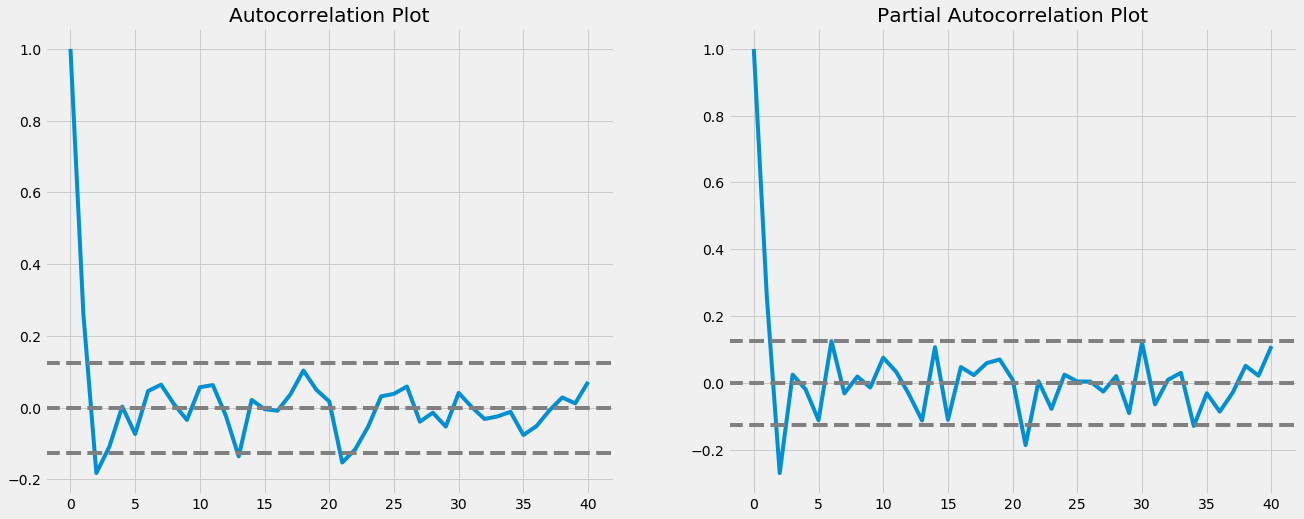

In [8]:
num_ret.lags()

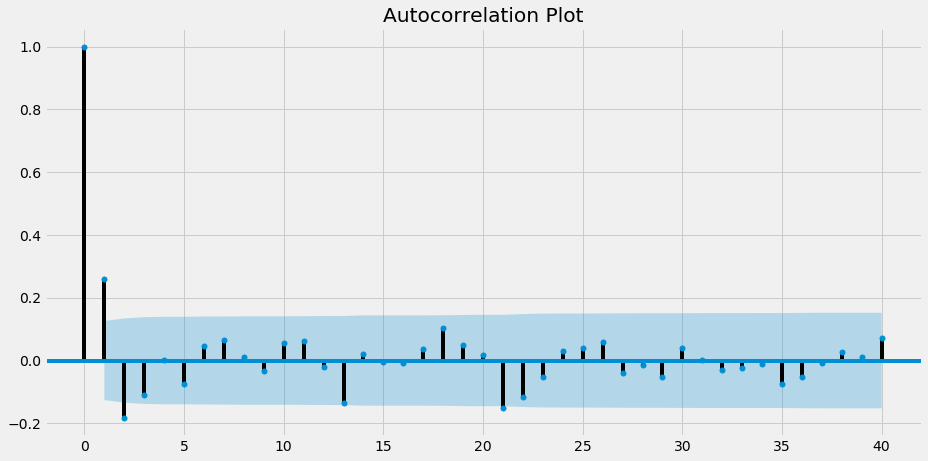

In [9]:
num_ret.auto_graphics()

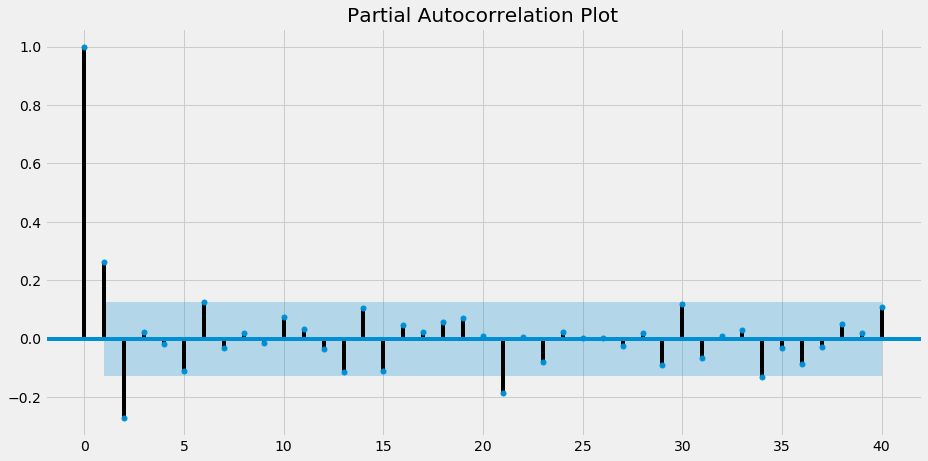

In [10]:
num_ret.partial_graphics()

In [11]:
num_ret.ARIMA_model(1,1)

                           Results: ARMA
Model:              ARMA             BIC:                 1808.1012 
Dependent Variable: Returns          Log-Likelihood:      -893.07   
Date:               2019-10-18 17:58 Scale:               1.0000    
No. Observations:   242              Method:              css-mle   
Df Model:           3                Sample:              02-19-2018
Df Residuals:       239                                   06-23-2017
Converged:          1.0000           S.D. of innovations: 9.690     
No. Iterations:     7.0000           HQIC:                1799.767  
AIC:                1794.1455                                       
---------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
---------------------------------------------------------------------
const              0.6486    0.8393   0.7728  0.4404  -0.9963  2.2936
ar.L1.Returns     -0.0761    0.1250  -0.6088  0.5432  -0.3

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


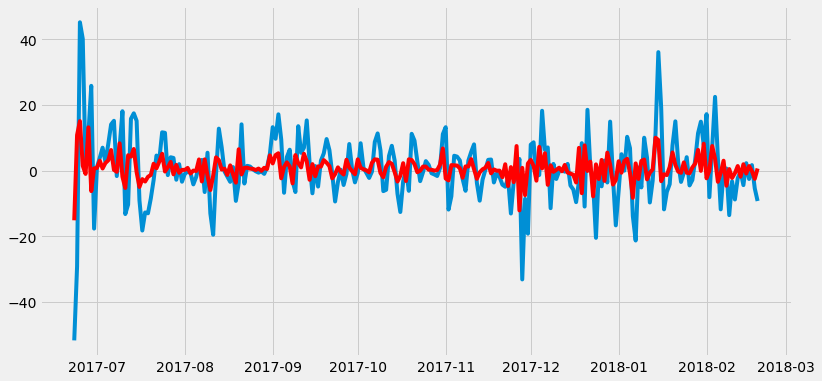

In [12]:
num_ret.plot_predict()

In [5]:
df_num.data = df_num.data['2017-01-01':]

In [6]:
from produce_predict import *
#This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” 
#to find the optimal set of parameters that yields the best performance for our model.
num_sarima = produce_predict(df_num.data)

In [7]:
num_sarima.order()

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:2300.3320754029155
ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:1814.9351044094437
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:1747.9629296174003
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:1451.4347308886936
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:1700.186476084938
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:1693.0607938658502
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:1460.4504735985536
ARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:1424.8525927269322
ARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:1994.7983307262512
ARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:1553.857676261927
ARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:1491.689520729621
ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:1237.3266191548576
ARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:1464.9830147608845
ARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:1453.37033494966
ARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:1253.7992798520183
ARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:1241.488853127773
ARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:1366.7124022069265
ARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:951.571076978956
ARIMA(0, 1, 0)x(0, 1, 0, 30) - AIC:1

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 30) - AIC:1326.8059328822906
ARIMA(1, 0, 0)x(0, 1, 1, 30) - AIC:928.6499579347204
ARIMA(1, 0, 0)x(1, 0, 0, 30) - AIC:956.2834306066094
ARIMA(1, 0, 0)x(1, 0, 1, 30) - AIC:958.2830690514567
ARIMA(1, 0, 0)x(1, 1, 0, 30) - AIC:927.5964023818108
ARIMA(1, 0, 0)x(1, 1, 1, 30) - AIC:869.8638563108069
ARIMA(1, 0, 1)x(0, 0, 0, 30) - AIC:1363.778283684144


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 30) - AIC:938.145129427388
ARIMA(1, 0, 1)x(0, 1, 0, 30) - AIC:1211.1406941907476
ARIMA(1, 0, 1)x(0, 1, 1, 30) - AIC:903.271615429658
ARIMA(1, 0, 1)x(1, 0, 0, 30) - AIC:941.8079899014309
ARIMA(1, 0, 1)x(1, 0, 1, 30) - AIC:940.0924495143
ARIMA(1, 0, 1)x(1, 1, 0, 30) - AIC:907.6969188571195
ARIMA(1, 0, 1)x(1, 1, 1, 30) - AIC:848.4080757826168
ARIMA(1, 1, 0)x(0, 0, 0, 30) - AIC:1351.2901540411106
ARIMA(1, 1, 0)x(0, 0, 1, 30) - AIC:940.2163171921977
ARIMA(1, 1, 0)x(0, 1, 0, 30) - AIC:1250.2869997345572
ARIMA(1, 1, 0)x(0, 1, 1, 30) - AIC:906.8339186760696
ARIMA(1, 1, 0)x(1, 0, 0, 30) - AIC:939.9076920544046
ARIMA(1, 1, 0)x(1, 0, 1, 30) - AIC:941.8881126262827
ARIMA(1, 1, 0)x(1, 1, 0, 30) - AIC:906.9418587146574
ARIMA(1, 1, 0)x(1, 1, 1, 30) - AIC:850.9762262694253
ARIMA(1, 1, 1)x(0, 0, 0, 30) - AIC:1298.8454800058526
ARIMA(1, 1, 1)x(0, 0, 1, 30) - AIC:933.4395392529003
ARIMA(1, 1, 1)x(0, 1, 0, 30) - AIC:1188.1688114237938
ARIMA(1, 1, 1)x(0, 1, 1, 30) - AIC:900.5695795

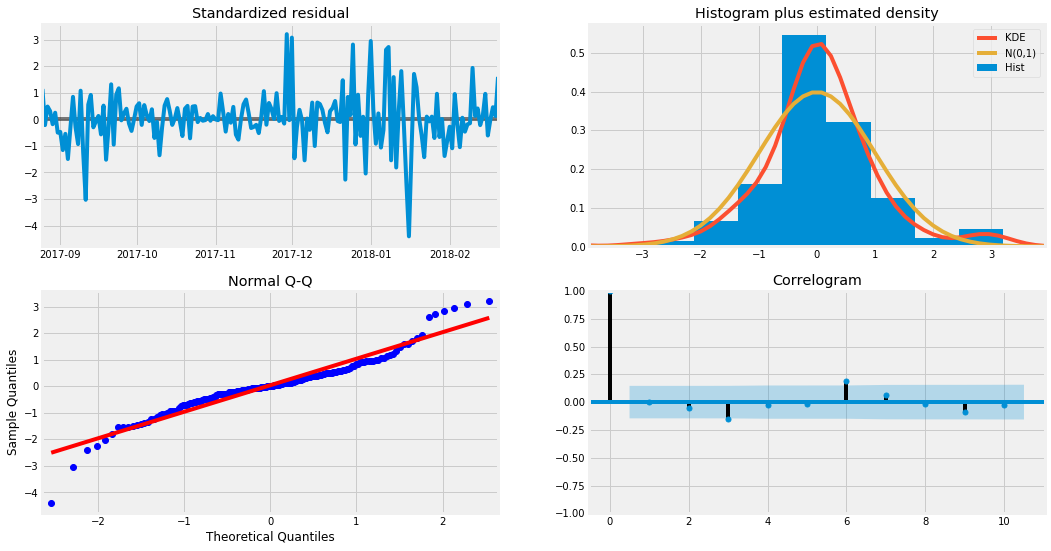

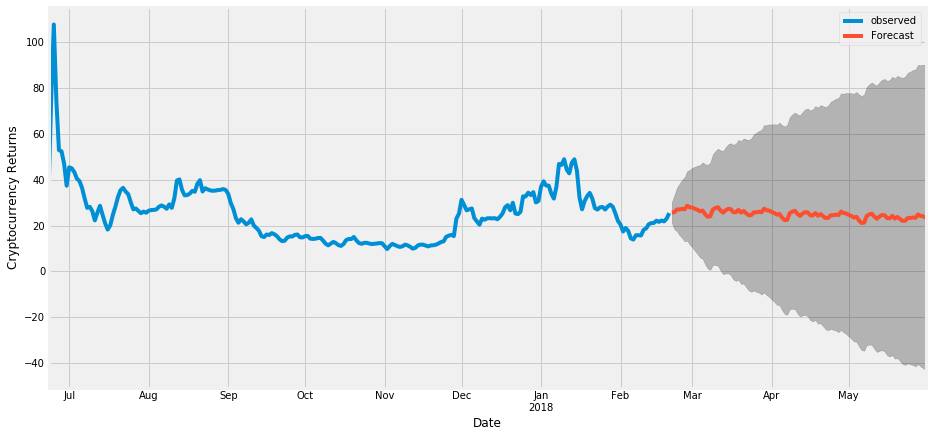

In [8]:
num_sarima.sarima_model((0,1,1),(1,1,1,30))
num_sarima.diagnostics()
num_sarima.produce_forecast()

In [9]:
from fbprophet import Prophet
from prophet_model import *
num_pro = prophet_model("numeraire_price.csv",0)

<Figure size 1296x432 with 0 Axes>

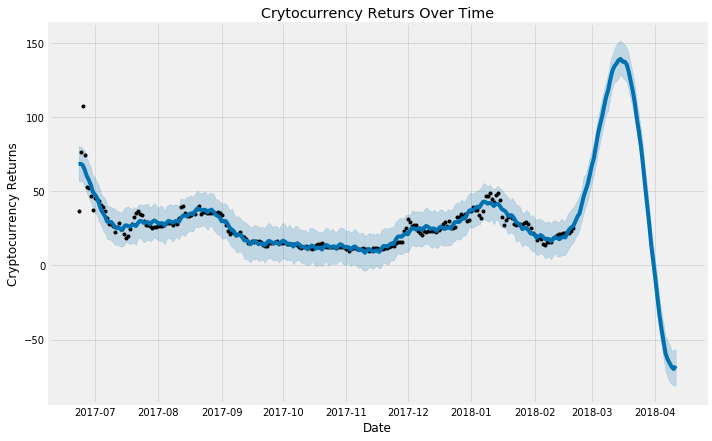

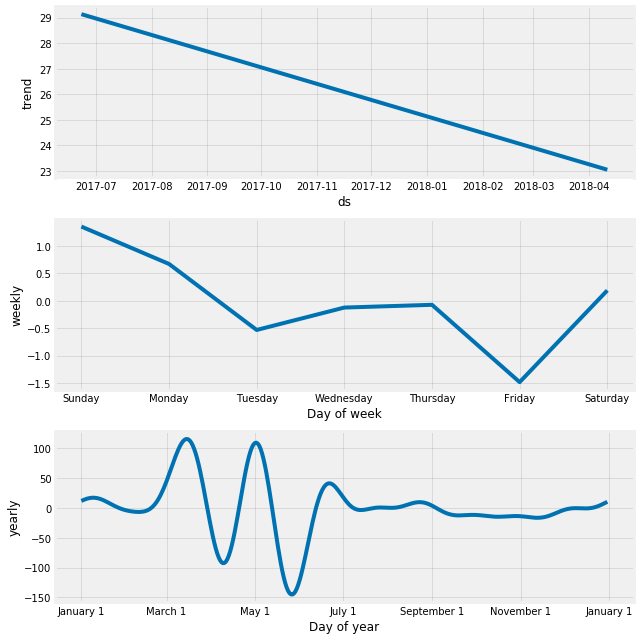

In [10]:
num_pro.model()
num_pro.forecast()
num_pro.Vizualization()

In [6]:
from VaR import *
var = Var(df_num.data)

C:\Users\mehul\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mehul\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


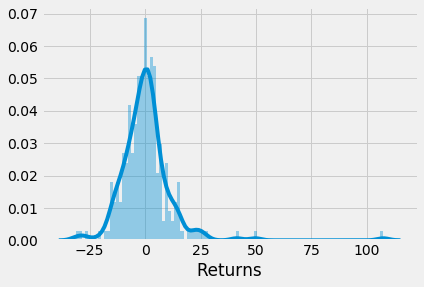

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -14.8695
95%                           -19.2142
99%                           -27.3641


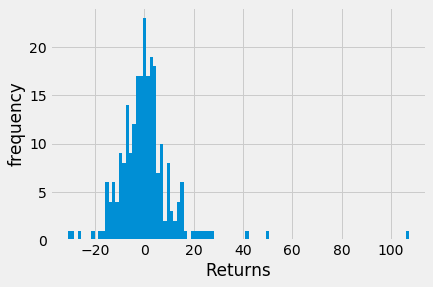

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -11.2615
95%                           -13.6371
99%                           -24.0888


In [7]:
var.var_cov(100)
var.hist_sim(100)

In [8]:
var.monte_carlo()

Simulated VAR is  -280.0191084070384
